In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

## EDA

In [2]:
df = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
submission = pd.read_csv('sample_submission_.csv')

In [11]:
df.head()

,account_info,duration_month,credit_history,purpose,credit_amount,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,<0,6.0,A34,radio/TV,1169,unknown,A75,4,A93,A101,4.0,A121,67.0,A143,A152,2,A173,1,yes,foreigner
1,0-199,48.0,A32,radio/TV,5951,<100,A73,2,A92,A101,2.0,A121,22.0,A143,A152,1,A173,1,no,foreigner
2,unknown,12.0,A34,education,2096,<100,A74,2,A93,A101,3.0,A121,49.0,A143,A152,1,A172,2,no,foreigner
3,<0,42.0,A32,furniture/equipment,7882,<100,A74,2,A93,A103,4.0,A122,45.0,A143,A153,1,A173,2,no,foreigner
4,<0,24.0,A33,new_car,4870,<100,A73,3,A93,A101,4.0,A124,53.0,A143,A153,2,A173,2,no,foreigner


In [4]:
test.head()

,serial number,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,unknown,24.0,A34,education,<100,A75,4,A93,A101,4.0,A124,54.0,A143,A153,2,A173,2,no,foreigner
1,2,0-199,18.0,A34,radio/TV,<100,A75,3,A92,A103,4.0,A121,48.0,A141,A151,2,A172,1,yes,foreigner
2,3,<0,NaN,A34,furniture/equipment,<100,A75,1,A92,A101,4.0,A122,24.0,A143,A152,2,A173,1,no,foreigner
3,4,unknown,12.0,A34,radio/TV,unknown,A75,4,A93,A101,NaN,A123,35.0,A143,A152,2,A173,1,no,foreigner
4,5,0-199,12.0,A32,new_car,unknown,A71,1,A92,A101,2.0,A121,24.0,A143,A151,1,A171,1,no,foreigner


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     777 non-null    int64  
 1   account_info      777 non-null    object 
 2   duration_month    750 non-null    float64
 3   credit_history    777 non-null    object 
 4   purpose           777 non-null    object 
 5   credit_amount     777 non-null    int64  
 6   savings_account   777 non-null    object 
 7   employment_st     777 non-null    object 
 8   poi               777 non-null    int64  
 9   personal_status   777 non-null    object 
 10  gurantors         777 non-null    object 
 11  resident_since    764 non-null    float64
 12  property_type     777 non-null    object 
 13  age               744 non-null    float64
 14  installment_type  777 non-null    object 
 15  housing_type      777 non-null    object 
 16  credits_no        777 non-null    int64  
 17  jo

In [8]:
df.describe()

,duration_month,credit_amount,poi,resident_since,age,credits_no,liables
count,772.000000,800.000000,800.000000,787.000000,767.000000,800.000000,800.000000
mean,20.645078,3190.976250,2.966250,2.822109,35.423729,1.396250,1.147500
std,12.374860,2732.671789,1.128806,1.105788,11.714471,0.569773,0.354825
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1342.250000,2.000000,2.000000,26.000000,1.000000,1.000000
50%,18.000000,2281.500000,3.000000,3.000000,32.000000,1.000000,1.000000
75%,24.000000,3914.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,15945.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [4]:
df.drop('serial number', axis =1, inplace = True)
test.drop('serial number', axis =1, inplace = True)
df.foreigner.value_counts()

foreigner
foreigner    745
?             28
resident      27
Name: count, dtype: int64

## Handling Missing Value

In [7]:
for col in df.columns:
    if ('?' in df[col].values):
        print(f"Column '{col}' contains '?' values.")
for col in test.columns:
    if ('?' in test[col].values):
        print(f"Column '{col}' contains '?' values.")

Column 'account_info' contains '?' values.
Column 'gurantors' contains '?' values.
Column 'foreigner' contains '?' values.
Column 'account_info' contains '?' values.
Column 'gurantors' contains '?' values.
Column 'foreigner' contains '?' values.


In [5]:
print(df['telephone'].value_counts())


telephone
no     458
yes    319
Name: count, dtype: int64


In [3]:
if '?' in df['telephone'].values:
    df = df[df['telephone'] != '?']


#Create a new DataFrame containing records with '?' value
df_with_question_mark = df[df.eq('?').any(axis=1)]

In [7]:
for col in df_with_question_mark.columns:
    if ('?' in df_with_question_mark[col].values):
        print([col])
        print(df_with_question_mark[col].value_counts())
        print()

['account_info']
account_info
unknown    21
<0         13
?          13
0-199      11
>=200       4
Name: count, dtype: int64

['gurantors']
gurantors
A101    36
?       24
A103     2
Name: count, dtype: int64

['foreigner']
foreigner
foreigner    32
?            28
resident      2
Name: count, dtype: int64



In [8]:
test_with_question_mark = test[test.eq('?').any(axis=1)]
test_with_question_mark.shape

(24, 20)

In [9]:
for col in test_with_question_mark.columns:
    if ('?' in test_with_question_mark[col].values):
        print([col])
        print(test_with_question_mark[col].value_counts())
        print()

['account_info']
account_info
?          9
<0         7
unknown    4
0-199      3
>=200      1
Name: count, dtype: int64

['gurantors']
gurantors
A101    17
?        7
Name: count, dtype: int64

['foreigner']
foreigner
foreigner    15
?             9
Name: count, dtype: int64



In [3]:
df.replace('?', np.nan, inplace=True)
test.replace('?',np.nan, inplace = True)

In [6]:
df.isnull().sum()/800 * 100


serial number       0.000
account_info        1.750
duration_month      0.000
credit_history      0.000
purpose             0.000
credit_amount       0.000
savings_account     0.000
employment_st       0.000
poi                 0.000
personal_status     0.000
gurantors           3.000
resident_since      1.625
property_type       0.000
age                 0.000
installment_type    0.000
housing_type        0.000
credits_no          0.000
job_type            0.000
liables             0.000
telephone           2.875
foreigner           3.500
dtype: float64

In [7]:
test.isnull().sum()

account_info         9
duration_month      10
credit_history       0
purpose              0
savings_account      0
employment_st        0
poi                  0
personal_status      0
gurantors            7
resident_since       6
property_type        0
age                  6
installment_type     0
housing_type         0
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            9
dtype: int64

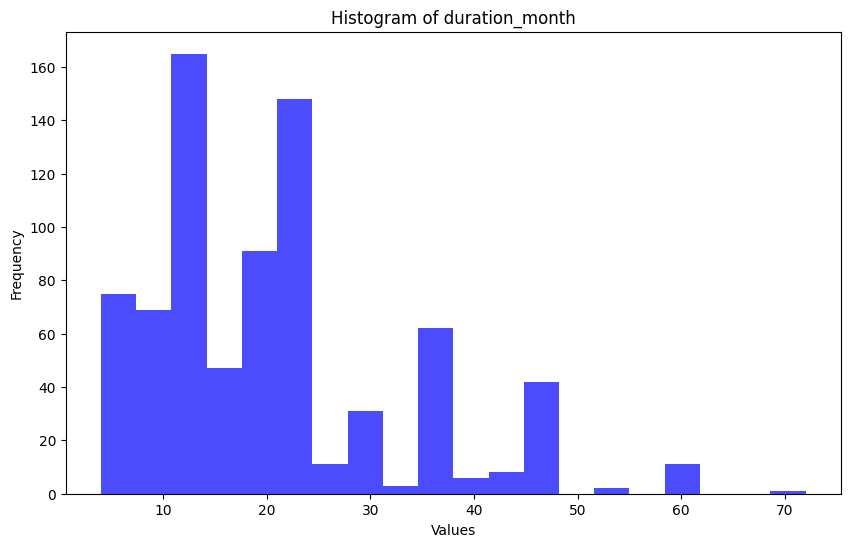

In [15]:
plt.figure(figsize=(10, 6))
df['duration_month'].hist(bins=20, color='blue', alpha=0.7)
plt.title('Histogram of duration_month')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

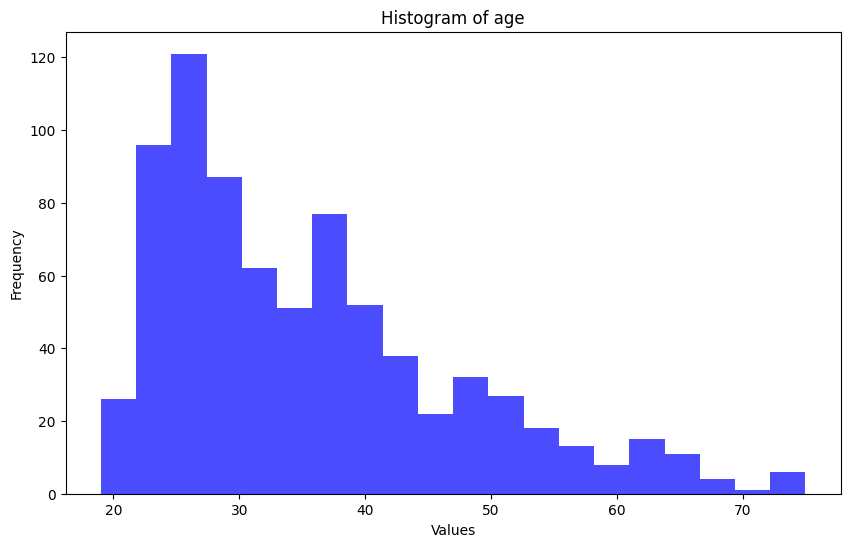

In [13]:
plt.figure(figsize=(10, 6))
df['age'].hist(bins=20, color='blue', alpha=0.7)
plt.title('Histogram of age')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.
plt.grid(False)
plt.show()

In [4]:
df['duration_month'].fillna(df['duration_month'].median(),inplace=True)
df['age'].fillna(df['age'].median(),inplace=True)


In [5]:
test['duration_month'].fillna(test['duration_month'].median(),inplace=True)
test['age'].fillna(test['age'].median(),inplace=True)

In [6]:
df.fillna(df.mode().iloc[0], inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     800 non-null    int64  
 1   account_info      800 non-null    object 
 2   duration_month    800 non-null    float64
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   credit_amount     800 non-null    int64  
 6   savings_account   800 non-null    object 
 7   employment_st     800 non-null    object 
 8   poi               800 non-null    int64  
 9   personal_status   800 non-null    object 
 10  gurantors         800 non-null    object 
 11  resident_since    800 non-null    float64
 12  property_type     800 non-null    object 
 13  age               800 non-null    float64
 14  installment_type  800 non-null    object 
 15  housing_type      800 non-null    object 
 16  credits_no        800 non-null    int64  
 1

In [8]:
test.fillna(test.mode().iloc[0], inplace=True)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     200 non-null    int64  
 1   account_info      200 non-null    object 
 2   duration_month    200 non-null    float64
 3   credit_history    200 non-null    object 
 4   purpose           200 non-null    object 
 5   savings_account   200 non-null    object 
 6   employment_st     200 non-null    object 
 7   poi               200 non-null    int64  
 8   personal_status   200 non-null    object 
 9   gurantors         200 non-null    object 
 10  resident_since    200 non-null    float64
 11  property_type     200 non-null    object 
 12  age               200 non-null    float64
 13  installment_type  200 non-null    object 
 14  housing_type      200 non-null    object 
 15  credits_no        200 non-null    int64  
 16  job_type          200 non-null    object 
 1

In [27]:
df.isnull().sum()

serial number       0
account_info        0
duration_month      0
credit_history      0
purpose             0
credit_amount       0
savings_account     0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64

In [20]:
for col in test_with_question_mark.columns:
    if ('?' in test_with_question_mark[col].values):
        print([col])
        print(test[col].value_counts())
        print()

['account_info']
account_info
unknown    84
<0         65
0-199      43
>=200       8
Name: count, dtype: int64

['gurantors']
gurantors
A101    179
A102     11
A103     10
Name: count, dtype: int64

['foreigner']
foreigner
foreigner    190
resident      10
Name: count, dtype: int64



In [23]:
for col in test_with_question_mark.columns:
    if ('?' in test_with_question_mark[col].values):
        print([col])
        print(test_check[col].value_counts())
        print()

NameError: name 'test_with_question_mark' is not defined

In [26]:
for col in df_check:
    if ('?' in df_check[col].values):
        print(col)
        print(test_check[col].value_counts())
        print(test[col].value_counts())
        print(df[col].value_counts())
        print(df_check[col].value_counts())

account_info
account_info
unknown    75
<0         65
0-199      43
?           9
>=200       8
Name: count, dtype: int64
account_info
unknown    84
<0         65
0-199      43
>=200       8
Name: count, dtype: int64
account_info
unknown    310
0-199      226
<0         209
>=200       55
Name: count, dtype: int64
account_info
unknown    296
0-199      226
<0         209
>=200       55
?           14
Name: count, dtype: int64
gurantors
gurantors
A101    172
A102     11
A103     10
?         7
Name: count, dtype: int64
gurantors
A101    179
A102     11
A103     10
Name: count, dtype: int64
gurantors
A101    728
A103     42
A102     30
Name: count, dtype: int64
gurantors
A101    704
A103     42
A102     30
?        24
Name: count, dtype: int64
telephone
telephone
no     115
yes     85
Name: count, dtype: int64
telephone
no     115
yes     85
Name: count, dtype: int64
telephone
no     481
yes    319
Name: count, dtype: int64
telephone
no     458
yes    319
?       23
Name: count, dtype: i

In [28]:
for col in df_with_question_mark.columns:
    if ('?' in df_with_question_mark[col].values):
        print([col])
        print(df[col].value_counts())
        print()
        print('As per observation all the value of null value went into the unknown, A101, and foreigner value after mode imputation')

['account_info']
account_info
unknown    299
0-199      221
<0         204
>=200       53
Name: count, dtype: int64

As per observation all the value of null value went into the unknown, A101, and foreigner value after mode imputation
['gurantors']
gurantors
A101    708
A103     40
A102     29
Name: count, dtype: int64

As per observation all the value of null value went into the unknown, A101, and foreigner value after mode imputation
['foreigner']
foreigner
foreigner    750
resident      27
Name: count, dtype: int64

As per observation all the value of null value went into the unknown, A101, and foreigner value after mode imputation


In [24]:
for col in df_with_question_mark.columns:
    if ('?' in df_with_question_mark[col].values):
        print([col])
        print(df_with_question_mark[col].value_counts())
        print()

['account_info']
account_info
unknown    21
<0         13
?          13
0-199      11
>=200       4
Name: count, dtype: int64

['gurantors']
gurantors
A101    36
?       24
A103     2
Name: count, dtype: int64

['foreigner']
foreigner
foreigner    32
?            28
resident      2
Name: count, dtype: int64



In [25]:
if '?' in df_check['telephone'].values:
    df_check = df_check[df_check['telephone'] != '?']


In [26]:
for col in df_with_question_mark.columns:
    if ('?' in df_with_question_mark[col].values):
        print([col])
        print(df_check[col].value_counts())
        print()

['account_info']
account_info
unknown    286
0-199      221
<0         204
>=200       53
?           13
Name: count, dtype: int64

['gurantors']
gurantors
A101    684
A103     40
A102     29
?        24
Name: count, dtype: int64

['foreigner']
foreigner
foreigner    722
?             28
resident      27
Name: count, dtype: int64



## Converting Categorical to Numerical value

colname = df.columns
for col in colname:
    print(df[col].value_counts())

In [10]:
df['account_info'] = df['account_info'].apply(lambda x: 1 if x == '0-199' else (0 if x == '<0' else (2 if x == '>=200' else(3 if x == 'unknown' else x))))
df['savings_account'] = df['savings_account'].apply(lambda x: 1 if x == '<100' else (2 if x == '100-499' else (3 if x == '500-999' else (4 if x == '>=1000' else (5 if x == 'unknown' else x)))))
df['credit_history'] = df['credit_history'].replace({'A30':0,'A31': 1, 'A32': 2, 'A33': 3, 'A34': 4})
df['employment_st'] = df['employment_st'].replace({'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4,'A75':5})
df['personal_status'] = df['personal_status'].replace({'A91': 1, 'A92': 2, 'A93': 3, 'A94': 4,'A95':5})
df['gurantors'] = df['gurantors'].replace({'A101': 1, 'A102': 2, 'A103': 3})
df['property_type'] = df['property_type'].replace({'A121': 1, 'A122': 2, 'A123': 3, 'A124': 4})
df['installment_type'] = df['installment_type'].replace({'A141': 1, 'A142': 2, 'A143': 3})
df['housing_type'] = df['housing_type'].replace({'A151': 1, 'A152': 2, 'A153': 3})
df['job_type'] = df['job_type'].replace({'A171': 1, 'A172': 2, 'A173': 3,'A174':4})
df['foreigner'] = df['foreigner'].replace({'foreigner':1, 'resident':2})
df['telephone'] = df['telephone'].replace({'yes':0,'no':1})

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['purpose'] = le.fit_transform(df['purpose'])
print("Purpose Mapping:")
for original, encoded in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original}: {encoded}")


Purpose Mapping:
business: 0
domestic_appliances: 1
education: 2
furniture/equipment: 3
new_car: 4
old_car: 5
other: 6
radio/TV: 7
repairing: 8
upskilling: 9


In [12]:
df.head()

,serial number,account_info,duration_month,credit_history,purpose,credit_amount,savings_account,employment_st,poi,personal_status,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,0,6.0,4,7,1169,5,5,4,3,...,4.0,1,67.0,3,2,2,3,1,0,1
1,2,1,48.0,2,7,5951,1,3,2,2,...,2.0,1,22.0,3,2,1,3,1,1,1
2,3,3,12.0,4,2,2096,1,4,2,3,...,3.0,1,49.0,3,2,1,2,2,1,1
3,4,0,42.0,2,3,7882,1,4,2,3,...,4.0,2,45.0,3,3,1,3,2,1,1
4,5,0,24.0,3,4,4870,1,3,3,3,...,4.0,4,53.0,3,3,2,3,2,1,1


In [13]:
test['account_info'] = test['account_info'].apply(lambda x: 1 if x == '0-199' else (0 if x == '<0' else (2 if x == '>=200' else(3 if x == 'unknown' else x))))
test['savings_account'] = test['savings_account'].apply(lambda x: 1 if x == '<100' else (2 if x == '100-499' else (3 if x == '500-999' else (4 if x == '>=1000' else (5 if x == 'unknown' else x)))))
test['credit_history'] = test['credit_history'].replace({'A30':0,'A31': 1, 'A32': 2, 'A33': 3, 'A34': 4})
test['employment_st'] = test['employment_st'].replace({'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4,'A75':5})
test['personal_status'] = test['personal_status'].replace({'A91': 1, 'A92': 2, 'A93': 3, 'A94': 4,'A95':5})
test['gurantors'] = test['gurantors'].replace({'A101': 1, 'A102': 2, 'A103': 3})
test['property_type'] = test['property_type'].replace({'A121': 1, 'A122': 2, 'A123': 3, 'A124': 4})
test['installment_type'] = test['installment_type'].replace({'A141': 1, 'A142': 2, 'A143': 3})
test['housing_type'] = test['housing_type'].replace({'A151': 1, 'A152': 2, 'A153': 3})
test['job_type'] = test['job_type'].replace({'A171': 1, 'A172': 2, 'A173': 3,'A174':4})
test['foreigner'] = test['foreigner'].replace({'foreigner':1, 'resident':2})
test['telephone'] = test['telephone'].replace({'yes':0,'no':1})


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test['purpose'] = le.fit_transform(test['purpose'])
print("Purpose Mapping:")
for original, encoded in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original}: {encoded}")

Purpose Mapping:
business: 0
domestic_appliances: 1
education: 2
furniture/equipment: 3
new_car: 4
old_car: 5
other: 6
radio/TV: 7
repairing: 8
upskilling: 9


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     200 non-null    int64  
 1   account_info      200 non-null    int64  
 2   duration_month    200 non-null    float64
 3   credit_history    200 non-null    int64  
 4   purpose           200 non-null    int32  
 5   savings_account   200 non-null    int64  
 6   employment_st     200 non-null    int64  
 7   poi               200 non-null    int64  
 8   personal_status   200 non-null    int64  
 9   gurantors         200 non-null    int64  
 10  resident_since    200 non-null    float64
 11  property_type     200 non-null    int64  
 12  age               200 non-null    float64
 13  installment_type  200 non-null    int64  
 14  housing_type      200 non-null    int64  
 15  credits_no        200 non-null    int64  
 16  job_type          200 non-null    int64  
 1

## Creating X and Y variable for df

In [37]:
print(df.columns)

Index(['account_info', 'duration_month', 'credit_history', 'purpose',
       'credit_amount', 'savings_account', 'employment_st', 'poi',
       'personal_status', 'gurantors', 'resident_since', 'property_type',
       'age', 'installment_type', 'housing_type', 'credits_no', 'job_type',
       'liables', 'telephone', 'foreigner'],
      dtype='object')


In [16]:
X_train = df[['account_info', 'duration_month', 'credit_history', 'purpose',
        'savings_account', 'employment_st', 'poi',
       'personal_status', 'gurantors', 'resident_since', 'property_type',
       'age', 'installment_type', 'housing_type', 'credits_no', 'job_type',
       'liables', 'telephone', 'foreigner']]
Y_train =  df['credit_amount']

In [17]:
X_test = test[['account_info', 'duration_month', 'credit_history', 'purpose',
        'savings_account', 'employment_st', 'poi',
       'personal_status', 'gurantors', 'resident_since', 'property_type',
       'age', 'installment_type', 'housing_type', 'credits_no', 'job_type',
       'liables', 'telephone', 'foreigner']]

## Scaling the data

In [18]:
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

In [19]:
print(X_test_scale)

[[ 1.14199685  0.28355309  1.33983761 ...  2.40409256  0.81437194
  -0.18689261]
 [-0.46928618 -0.20994032  1.33983761 ... -0.41595736 -1.22794014
  -0.18689261]
 [-1.2749277  -0.20994032  1.33983761 ... -0.41595736  0.81437194
  -0.18689261]
 ...
 [ 1.14199685 -0.70343373 -0.50503346 ... -0.41595736  0.81437194
  -0.18689261]
 [-1.2749277   2.01078001 -0.50503346 ... -0.41595736 -1.22794014
  -0.18689261]
 [-0.46928618  2.01078001  1.33983761 ... -0.41595736  0.81437194
  -0.18689261]]


## Gradient Boosting Regressor

In [20]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import  GradientBoostingRegressor
lm_Lasso= GradientBoostingRegressor(n_estimators=100, alpha=0.99,  validation_fraction=0.2,learning_rate=0.1,
                                    max_depth = 3, min_samples_split = 2)
lm_Lasso.fit(X_train_scale, Y_train)


# make a prediction
y_pred_lasso = lm_Lasso.predict(X_test_scale)

print(y_pred_lasso)

[ 2115.02659805  2585.3670515   3291.24071107  1227.90454443
  3844.84986155  6951.8090182    656.86940418  1102.14821459
 11219.22374671  1613.33633252   726.24818197   622.07561939
  4771.12937486  5919.80749768  5136.12095465  5656.36757553
  1853.90449181  2290.26271268  8351.58556789  1211.30071498
  1317.62112243  1351.1179235   5136.88485346   667.82043655
  3786.68570412  2070.21754313  3526.88407592  2959.04321171
  4891.39504805  5059.0828451   2279.27816871  2026.52785964
  8834.72219597  4084.09703232  1935.53396779  1233.56130113
  1139.29633071  1911.62658219  2333.46749349  1483.0913997
  3721.12637498  2729.14861066  1686.59648781  2203.35158875
  2209.12628054  4306.9973631   3708.69597444  1550.59265566
  1490.38653152  1280.98430412  1941.1827629   3751.78987799
  2273.66407022  2040.37257948  6784.58480825  1611.27752947
   479.71052228  3080.46780779  2273.86298105  2462.47459072
  2364.71602213  2044.32538599  2103.11762812  3966.55694123
  1888.73574856  1754.536

In [21]:
lm_Lasso.score(X_train_scale,Y_train)

0.7889462089373716

In [22]:
Y_pred_rounded = np.round(y_pred_lasso)

print(Y_pred_rounded)

[ 2115.  2585.  3291.  1228.  3845.  6952.   657.  1102. 11219.  1613.
   726.   622.  4771.  5920.  5136.  5656.  1854.  2290.  8352.  1211.
  1318.  1351.  5137.   668.  3787.  2070.  3527.  2959.  4891.  5059.
  2279.  2027.  8835.  4084.  1936.  1234.  1139.  1912.  2333.  1483.
  3721.  2729.  1687.  2203.  2209.  4307.  3709.  1551.  1490.  1281.
  1941.  3752.  2274.  2040.  6785.  1611.   480.  3080.  2274.  2462.
  2365.  2044.  2103.  3967.  1889.  1755.  1828.  2460.  3945.   988.
  6176.  2378.  2644.  1559.  3055.  1087.  6385.  3638.  3522.  5172.
  4718.  5385.  3557.   852.  3170.   676.  3216.  9407.  5511.  4104.
  5467.  1664.  1319.  5196.  3101.  7175.  2823.  1660.  3228.  3362.
  3434.  3179.  7002.   782.  2532.  3236.  3421.  6071.  3672.  2470.
  3266.  3400.  5313.  4146.  2678. 10245.  3010.  4634.  3861.  4477.
  2260.  7269.  1105.  2839.  3305.  1695.  1877.  6165.  4149.  1432.
  2543.   993.  1597.  1390.  1127.  4791.  1177.   943.  6559.  5477.
  4304

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150,200,300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'learning_rate': [0.1, 0.01, 0.001]
    
}

# Initialize the Gradient Boosting Regressor
model_GB = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_GB, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the data to GridSearchCV
grid_search.fit(X_train_scale, Y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Make predictions on the test data using the best model
best_model_GB = grid_search.best_estimator_
Y_pred_GB_tuned = best_model_GB.predict(X_test_scale)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [28]:
# Create a DataFrame with predicted values
predicted_df = pd.DataFrame({'serial number': test['serial number'], 'credit_amount': Y_pred_rounded})

# Save the DataFrame to an Excel file
predicted_df.to_csv('output33.csv', index=False)

In [47]:
predicted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   serial number  200 non-null    int64  
 1   credit_amount  200 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


In [24]:
print(Y_pred_GB_tuned)

[ 2115.02659805  2585.3670515   3291.24071107  1227.90454443
  3844.84986155  6951.8090182    656.86940418  1102.14821459
 11219.22374671  1613.33633252   726.24818197   622.07561939
  4771.12937486  5919.80749768  5136.12095465  5656.36757553
  1853.90449181  2290.26271268  8351.58556789  1211.30071498
  1317.62112243  1351.1179235   5136.88485346   667.82043655
  3786.68570412  2070.21754313  3526.88407592  2959.04321171
  4891.39504805  5059.0828451   2279.27816871  2026.52785964
  8834.72219597  4084.09703232  1935.53396779  1233.56130113
  1139.29633071  1911.62658219  2333.46749349  1483.0913997
  3721.12637498  2729.14861066  1686.59648781  2203.35158875
  2209.12628054  4306.9973631   3708.69597444  1550.59265566
  1490.38653152  1280.98430412  1941.1827629   3751.78987799
  2273.66407022  2040.37257948  6784.58480825  1611.27752947
   479.71052228  3080.46780779  2273.86298105  2462.47459072
  2364.71602213  2044.32538599  2103.11762812  3966.55694123
  1888.73574856  1754.536

In [26]:
Y_pred_rounded = np.round(Y_pred_GB_tuned)

print(Y_pred_rounded)

[ 2115.  2585.  3291.  1228.  3845.  6952.   657.  1102. 11219.  1613.
   726.   622.  4771.  5920.  5136.  5656.  1854.  2290.  8352.  1211.
  1318.  1351.  5137.   668.  3787.  2070.  3527.  2959.  4891.  5059.
  2279.  2027.  8835.  4084.  1936.  1234.  1139.  1912.  2333.  1483.
  3721.  2729.  1687.  2203.  2209.  4307.  3709.  1551.  1490.  1281.
  1941.  3752.  2274.  2040.  6785.  1611.   480.  3080.  2274.  2462.
  2365.  2044.  2103.  3967.  1889.  1755.  1828.  2460.  3945.   988.
  6176.  2378.  2644.  1559.  3055.  1087.  6385.  3638.  3522.  5172.
  4718.  5385.  3557.   852.  3170.   676.  3216.  9407.  5511.  4104.
  5692.  1664.  1319.  5196.  3101.  7175.  2823.  1660.  3228.  3362.
  3434.  3179.  7002.   782.  2532.  3236.  3421.  6071.  3672.  2470.
  3266.  3400.  5313.  4360.  2678. 10245.  3010.  4634.  3861.  4477.
  2260.  7269.  1105.  2839.  3305.  1695.  1877.  5939.  4149.  1432.
  2543.   993.  1597.  1390.  1127.  4791.  1177.   943.  6559.  5477.
  4304